<a href="https://colab.research.google.com/github/Michelle-Lohwt/fetal-cardiotocography-analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Cardio_4
# Group Members

1. Pan Kwong Sing (152687)
2. Lim Phei San (152726)
3. Lim Zi Qiang (153116)
4. Loh Wan Teng (149104)

In [ ]:
pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Exploration

## Load dataset

In [ ]:
cardio_data = pd.read_csv('ctg.csv',sep=';')
cardio_df = pd.DataFrame(cardio_data)

In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [ ]:
cardio_df.isna().sum()

LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [ ]:
cardio_df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [ ]:
# Unique values
cardio_df.nunique()

LB           48
AC           22
FM           96
UC           19
ASTV         75
MSTV         57
ALTV         87
MLTV        249
DL           15
DS            2
DP            5
Width       154
Min         109
Max          86
Nmax         18
Nzeros        9
Mode         88
Mean        103
Median       95
Variance    133
Tendency      3
CLASS        10
NSP           3
dtype: int64

In [ ]:
# Check null rows in dataset
null_rows = cardio_df[cardio_df.isna().any(axis=1)]
null_rows

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,564.0,23.0,87.0,7.0,91.0,50.7,16.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove null rows
cardio_df = cardio_df.dropna()

In [ ]:
cardio_df.shape

(2126, 23)

In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [ ]:
cardio_df.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

# Train Test Split

In [ ]:
X = cardio_df.drop(['CLASS', 'NSP'], axis = 1)
y = cardio_df['NSP']

In [ ]:
# Get feature names
features = X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=102, stratify=y_train)

In [ ]:
print('X train size : ', X_train.shape)
print('y train size : ', y_train.shape)
print('X test size : ', X_test.shape)
print('y test size : ', y_test.shape)
print('X validation size: ', X_val.shape)
print('y validation size: ', y_val.shape)

X train size :  (1041, 21)
y train size :  (1041,)
X test size :  (638, 21)
y test size :  (638,)
X validation size:  (447, 21)
y validation size:  (447,)


## Feature Names

In [ ]:
feature_names=tuple(X.columns)

# Functions

## Confusion Matrix

In [ ]:
def cof_mat(cf_matrix, model, method):
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
            zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(3,3)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title(model + ' Model using ' + method + ' Confusion Matrix\n\n');
  ax.set_xlabel('\nPredicted Category')
  ax.set_ylabel('Actual Category');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Normal','Suspect', 'Pathologic'])
  ax.yaxis.set_ticklabels(['Normal','Suspect', 'Pathologic'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

## Sequential Backward Selection

### Sequential Backward Selection Graph

In [ ]:
def seq_plot(sbs, model):
  figl = plot_sfs(sbs.get_metric_dict(confidence_interval=0.95), kind='std_err')

  plt.title(model + ' Sequential Backward Selection')
  plt.show()

### Features Selection Average Score

In [ ]:
def feature_avg(sbs):
  df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
  return df[["feature_idx", "avg_score"]].sort_values(by='avg_score', ascending=False)

# Feature Selection and Model Training

## Filter Method (Mutual Information)


MI_values:
MSTV        0.246227
ALTV        0.204775
ASTV        0.200313
Mean        0.182674
Variance    0.174886
Mode        0.162639
Median      0.151729
LB          0.136444
AC          0.130749
Min         0.129689
Width       0.122940
MLTV        0.103194
Tendency    0.075352
DP          0.068884
UC          0.056115
FM          0.032654
Max         0.028933
DL          0.021378
Nzeros      0.009664
DS          0.007277
Nmax        0.000000
dtype: float64


Selected top 8 features: Index(['ALTV', 'ASTV', 'MSTV', 'Mean', 'Median', 'Min', 'Mode', 'Variance'], dtype='object')


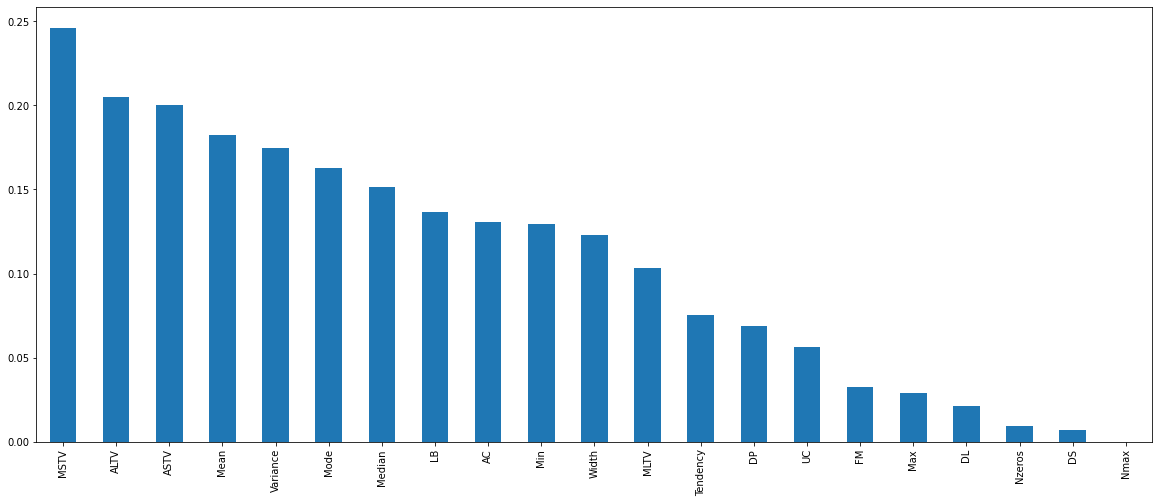

In [ ]:
# Calculate Mutual Information between each feature and the target
MI = mutual_info_classif(X_train, y_train)
MI

# Create Feature Target Mutual Information Series
MI_series = pd.Series(MI)
MI_series.index = X_train.columns
MI_values = MI_series.sort_values(ascending=False)

print('\nMI_values:') 
print(MI_values)

# plot the graph
MI_series.sort_values(ascending=False).plot.bar(figsize=(20,8))
# MI_series.plot.bar(figsize=(20,8))

# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=8).fit(X_train, y_train)
print('\n\nSelected top 8 features: {}'.format(X_train.columns[k_best_features.get_support()].sort_values(ascending=True)))

X_train_kbest = k_best_features.transform(X_train)
X_test_kbest = k_best_features.transform(X_test)
X_val_kbest = k_best_features.transform(X_val)

### Train model using MI features (KNN & SVM)

#### K-Nearest Neighbours (MI)

##### Find optimal K

In [ ]:
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
  model_knn = KNC(n_neighbors=k)
  model_knn.fit(X_train_kbest, y_train)
  score = model_knn.score(X_val_kbest, y_val)
  if score > max_score:
    max_score = score
    best_k = k
  scores.append(score)

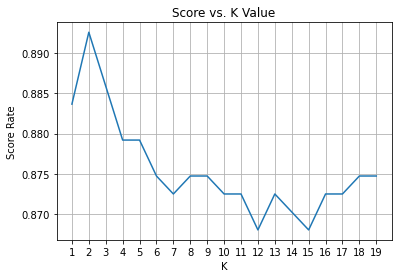

0.8926174496644296


In [ ]:
# Graph of Score vs K value
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')
plt.grid()
plt.show()
print(max(scores))

In [ ]:
best_k

2

##### Train kNN model using MI

0.8730407523510971


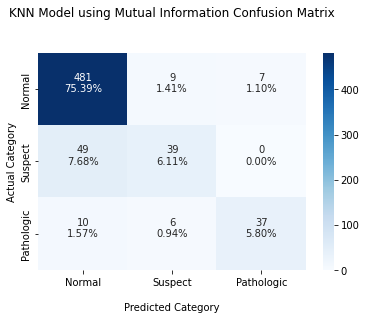

              precision    recall  f1-score   support

         1.0       0.89      0.97      0.93       497
         2.0       0.72      0.44      0.55        88
         3.0       0.84      0.70      0.76        53

    accuracy                           0.87       638
   macro avg       0.82      0.70      0.75       638
weighted avg       0.86      0.87      0.86       638



In [ ]:
model_knn = KNC(n_neighbors=best_k)
model_knn.fit(X_train_kbest, y_train)
y_pred = model_knn.predict(X_test_kbest)
cf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
cof_mat(cf_matrix, 'KNN', 'Mutual Information')
print(clf_report)

#### SVM (MI)

##### Radial SVM

0.8197492163009404


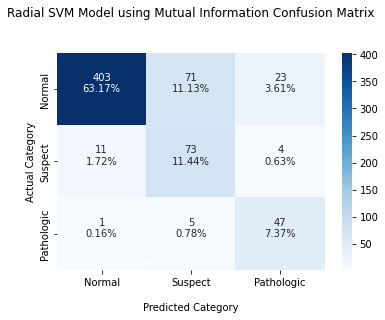

              precision    recall  f1-score   support

         1.0       0.97      0.81      0.88       497
         2.0       0.49      0.83      0.62        88
         3.0       0.64      0.89      0.74        53

    accuracy                           0.82       638
   macro avg       0.70      0.84      0.75       638
weighted avg       0.88      0.82      0.83       638



In [ ]:
# Train radial SVM model
model_svm = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced', probability=True,decision_function_shape='ovr')
trained_svm = model_svm.fit(X_train_kbest, y_train)
prediction_svm = model_svm.predict(X_test_kbest)
cf_matrix = confusion_matrix(y_test, prediction_svm)
clf_report = classification_report(y_test, prediction_svm)

print(accuracy_score(y_test, prediction_svm))
cof_mat(cf_matrix, 'Radial SVM', 'Mutual Information')
print(clf_report)

##### Linear SVM

0.8275862068965517


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


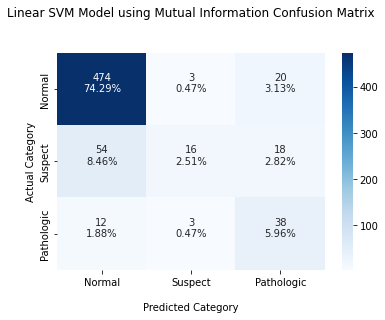

              precision    recall  f1-score   support

         1.0       0.88      0.95      0.91       497
         2.0       0.73      0.18      0.29        88
         3.0       0.50      0.72      0.59        53

    accuracy                           0.83       638
   macro avg       0.70      0.62      0.60       638
weighted avg       0.83      0.83      0.80       638



In [ ]:
# Train Linear SVM Model
trained_svm = LinearSVC(class_weight = 'balanced').fit(X_train_kbest, y_train)
# X_test_selected = fvalue_Best.transform(X_test)
prediction_svm = trained_svm.predict(X_test_kbest)
cf_matrix = confusion_matrix(y_test, prediction_svm)
clf_report = classification_report(y_test, prediction_svm)

print(accuracy_score(y_test, prediction_svm))
cof_mat(cf_matrix, 'Linear SVM', 'Mutual Information')
print(clf_report)

## Wrapper Method (Sequential Backward Selection)

### KNN Model

##### Find optimal K

In [ ]:
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
  model_knn = KNC(n_neighbors=k)
  model_knn.fit(X_train, y_train)
  score = model_knn.score(X_val, y_val)
  if score > max_score:
    max_score = score
    best_k = k
  scores.append(score)

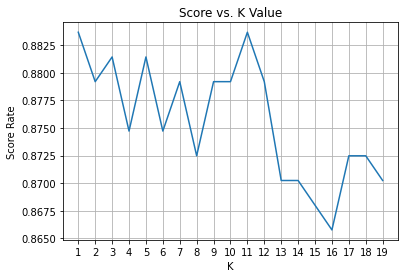

0.883668903803132


In [ ]:
# Graph of Score vs K value
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')
plt.grid()
plt.show()
print(max(scores))

In [ ]:
best_k

1

#### Feature Selection

In [ ]:
# KNN Model for Sequential Backward Selection
knn_model = KNC(n_neighbors = best_k)

In [ ]:
# Sequential Backward Selection
sbs_knn = SFS(knn_model, 
            k_features='best', forward=False, 
            floating=False, verbose=2, scoring='accuracy', cv=0)

In [ ]:
sbs_knn.fit(X_train, y_train,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.3s finished

[2022-05-28 02:03:37] Features: 20/1 -- score: 0.9980787704130644[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.2s finished

[2022-05-28 02:03:39] Features: 19/1 -- score: 0.9980787704130644[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.1s finished

[2022-05-28 02:03:41] Features: 18/1 -- score: 0.9980787704130644[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=0, estimator=KNeighborsClassifier(n_neighbors=1),
                          forward=False, k_features='best', scoring='accuracy',
                          verbose=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


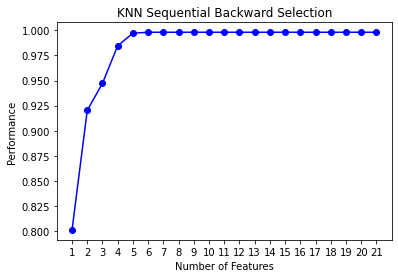

In [ ]:
seq_plot(sbs_knn, 'KNN')

In [ ]:
feature_avg(sbs_knn)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,avg_score
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.998079
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)",0.998079
6,"(0, 1, 2, 3, 4, 6)",0.998079
7,"(0, 1, 2, 3, 4, 5, 6)",0.998079
8,"(0, 1, 2, 3, 4, 5, 6, 7)",0.998079
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.998079
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",0.998079
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.998079
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)",0.998079
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.998079


In [ ]:
# Indices of the best features
sbs_knn.k_feature_names_, sbs_knn.k_feature_idx_

(('LB',
  'AC',
  'FM',
  'UC',
  'ASTV',
  'MSTV',
  'ALTV',
  'MLTV',
  'DL',
  'DS',
  'DP',
  'Width',
  'Min',
  'Max',
  'Nmax',
  'Nzeros',
  'Mode',
  'Mean',
  'Median',
  'Variance',
  'Tendency'),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

#### Training KNN model with selected features

In [ ]:
X_train_sbs = X_train.iloc[:,np.array(sbs_knn.k_feature_idx_)]

In [ ]:
X_test_sbs = X_test.iloc[:,np.array(sbs_knn.k_feature_idx_)]

0.896551724137931


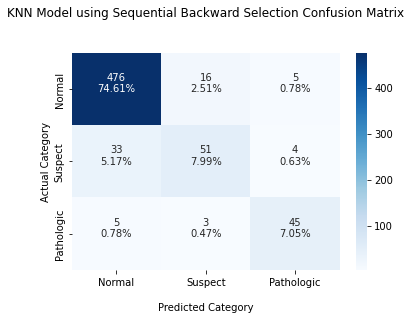

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       497
         2.0       0.73      0.58      0.65        88
         3.0       0.83      0.85      0.84        53

    accuracy                           0.90       638
   macro avg       0.83      0.80      0.81       638
weighted avg       0.89      0.90      0.89       638



In [ ]:
model_knn = KNC(n_neighbors = best_k)
model_knn.fit(X_train_sbs, y_train)
y_pred = model_knn.predict(X_test_sbs)
cf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
cof_mat(cf_matrix, 'KNN', 'Sequential Backward Selection')
print(clf_report)

### SVM Model

#### Radial SVM

##### Feature Selection

In [ ]:
# SVM model for Sequential Backward Selection
svm_model = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced', probability=True,
    decision_function_shape='ovr')

In [ ]:
sbs_svm = SFS(svm_model, 
            k_features='best', forward=False, 
            floating=False, verbose=2, scoring='accuracy', cv=0)

In [ ]:
sbs_svm.fit(X_train, y_train,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   16.9s finished

[2022-05-28 02:04:15] Features: 20/1 -- score: 0.8395773294908742[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.2s finished

[2022-05-28 02:04:22] Features: 19/1 -- score: 0.8395773294908742[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    6.7s finished

[2022-05-28 02:04:28] Features: 18/1 -- score: 0.8434197886647454[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=0,
                          estimator=SVC(C=1, class_weight='balanced',
                                        probability=True),
                          forward=False, k_features='best', scoring='accuracy',
                          verbose=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


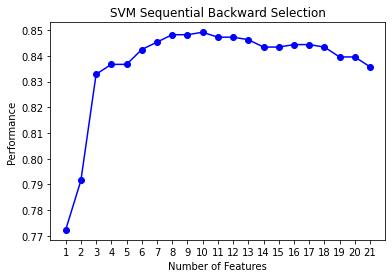

In [ ]:
seq_plot(sbs_svm, 'SVM')

In [ ]:
feature_avg(sbs_svm)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,avg_score
10,"(0, 1, 2, 3, 4, 6, 9, 10, 11, 16)",0.849183
8,"(0, 1, 2, 3, 4, 6, 11, 16)",0.848223
9,"(0, 1, 2, 3, 4, 6, 9, 11, 16)",0.848223
11,"(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 16)",0.847262
12,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 16)",0.847262
13,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 16)",0.846302
7,"(0, 1, 2, 4, 6, 11, 16)",0.845341
16,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15...",0.84438
17,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15...",0.84438
15,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16...",0.84342


In [ ]:
# Indices of the best features
sbs_svm.k_feature_names_, sbs_svm.k_feature_idx_

(('LB', 'AC', 'FM', 'UC', 'ASTV', 'ALTV', 'DS', 'DP', 'Width', 'Mode'),
 (0, 1, 2, 3, 4, 6, 9, 10, 11, 16))

##### Training Radial SVM model with selected features

In [ ]:
X_train_sbs = X_train.iloc[:,np.array(sbs_svm.k_feature_idx_)]

In [ ]:
X_test_sbs = X_test.iloc[:,np.array(sbs_svm.k_feature_idx_)]

0.8119122257053292


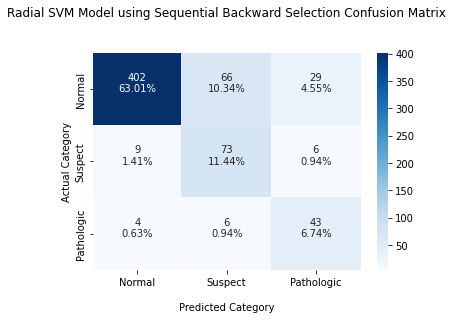

              precision    recall  f1-score   support

         1.0       0.97      0.81      0.88       497
         2.0       0.50      0.83      0.63        88
         3.0       0.55      0.81      0.66        53

    accuracy                           0.81       638
   macro avg       0.67      0.82      0.72       638
weighted avg       0.87      0.81      0.83       638



In [ ]:
test = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced', probability=True,decision_function_shape='ovr')
trained_svm = test.fit(X_train_sbs, y_train)
prediction_svm = test.predict(X_test_sbs)
cf_matrix = confusion_matrix(y_test, prediction_svm)
clf_report = classification_report(y_test, prediction_svm)

print(accuracy_score(y_test, prediction_svm))
cof_mat(cf_matrix, 'Radial SVM', 'Sequential Backward Selection')
print(clf_report)

#### Linear SVM

##### Feature Selection

In [ ]:
svm_linear_model = LinearSVC(class_weight = 'balanced')

In [ ]:
sbs_svm_linear = SFS(svm_linear_model, 
            k_features='best', forward=False, 
            floating=False, verbose=2, scoring='accuracy', cv=0)

In [ ]:
sbs_svm_linear.fit(X_train, y_train,custom_feature_names=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

SequentialFeatureSelector(cv=0, estimator=LinearSVC(class_weight='balanced'),
                          forward=False, k_features='best', scoring='accuracy',
                          verbose=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


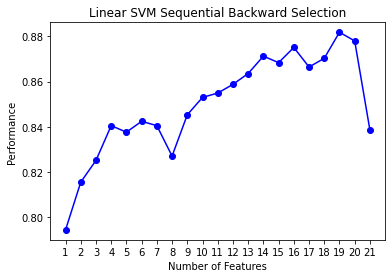

In [ ]:
seq_plot(sbs_svm_linear, 'Linear SVM')

In [ ]:
feature_avg(sbs_svm_linear)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,avg_score
19,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.881844
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.878002
16,"(0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 14, 15, 17, ...",0.87512
14,"(0, 1, 3, 5, 6, 8, 9, 10, 12, 14, 17, 18, 19, 20)",0.871278
18,"(0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",0.870317
15,"(0, 1, 3, 5, 6, 8, 9, 10, 12, 14, 15, 17, 18, ...",0.868396
17,"(0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...",0.866475
13,"(0, 1, 3, 5, 6, 8, 9, 10, 14, 17, 18, 19, 20)",0.863593
12,"(0, 1, 3, 5, 6, 8, 9, 10, 17, 18, 19, 20)",0.85879
11,"(0, 1, 3, 6, 8, 9, 10, 17, 18, 19, 20)",0.854947


In [ ]:
# Indices of the best features
sbs_svm_linear.k_feature_names_, sbs_svm_linear.k_feature_idx_

(('LB',
  'AC',
  'UC',
  'ASTV',
  'MSTV',
  'ALTV',
  'MLTV',
  'DL',
  'DS',
  'DP',
  'Width',
  'Min',
  'Max',
  'Nmax',
  'Nzeros',
  'Mean',
  'Median',
  'Variance',
  'Tendency'),
 (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20))

##### Training Linear SVM model with selected features

In [ ]:
X_train_sbs = X_train.iloc[:,np.array(sbs_svm_linear.k_feature_idx_)]

In [ ]:
X_test_sbs = X_test.iloc[:,np.array(sbs_svm_linear.k_feature_idx_)]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8526645768025078


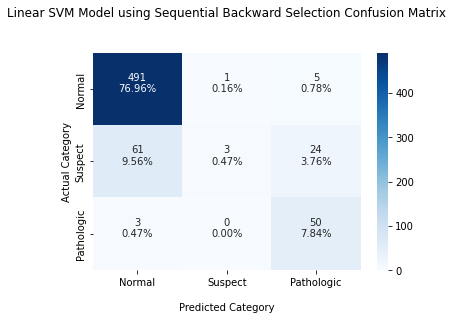

              precision    recall  f1-score   support

         1.0       0.88      0.99      0.93       497
         2.0       0.75      0.03      0.07        88
         3.0       0.63      0.94      0.76        53

    accuracy                           0.85       638
   macro avg       0.76      0.66      0.59       638
weighted avg       0.85      0.85      0.80       638



In [ ]:
# Train Linear SVM Model
trained_svm = LinearSVC(class_weight = 'balanced').fit(X_train_sbs, y_train)
# X_test_selected = fvalue_Best.transform(X_test)
prediction_svm = trained_svm.predict(X_test_sbs)
cf_matrix = confusion_matrix(y_test, prediction_svm)
clf_report = classification_report(y_test, prediction_svm)

print(accuracy_score(y_test, prediction_svm))
cof_mat(cf_matrix, 'Linear SVM', 'Sequential Backward Selection')
print(clf_report)